In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Data loading

In [6]:
import pandas as pd

In [72]:
df3 = pd.read_csv('2019-Nov.csv')

In [73]:
df4 = pd.read_csv('2019-Oct.csv')

In [136]:
df=pd.concat([df3,df4])

In [137]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


# Data extracting

###  In this part, we extract five random dataset within the size of 10000 and apply the same algorithms to see if the result is universal.

In [4]:
train=df.sample(n=10000)
train.to_csv('training set.csv',index=0,sep=',')

NameError: name 'df' is not defined

In [13]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
23246316,2019-11-13 20:38:32 UTC,view,27700714,2053013560086233771,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
4713333,2019-10-04 16:48:44 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
52190582,2019-11-21 15:53:43 UTC,view,1005212,2053013555631882655,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
59029472,2019-11-26 03:45:24 UTC,view,1005158,2053013555631882655,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
3574707,2019-10-04 01:05:43 UTC,view,5100738,2053013553341792533,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc


In [138]:
train2=df.sample(n=10000)
train2.to_csv('training set2.csv',index=0,sep=',')

In [139]:
train3=df.sample(n=10000)
train3.to_csv('training set3.csv',index=0,sep=',')

In [140]:
train4=df.sample(n=10000)
train4.to_csv('training set4.csv',index=0,sep=',')

In [141]:
train5=df.sample(n=10000)
train5.to_csv('training set5.csv',index=0,sep=',')

# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('training set.csv')

### Transform the event_time into type of (midnight, forenoon, afternoon and evening)

In [3]:
train['event_time']=[x[11:13] for x in train['event_time']]
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,20,view,27700714,2053013560086233771,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,16,view,1004767,2053013555631882655,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,15,view,1005212,2053013555631882655,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,03,view,1005158,2053013555631882655,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,01,view,5100738,2053013553341792533,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...,...
7796,10,view,1004945,2053013555631882655,electronics.smartphone,samsung,964.74,513779659,ace645f8-1f4e-48dc-bb07-b48dea2709b1
7797,15,view,26401045,2053013563651392361,NaN,NaN,145.18,568854544,3014fd2b-5b75-4f51-bf93-1515ba56a6db
7798,12,view,1307188,2053013558920217191,computers.notebook,hp,223.69,526943885,6c4c2895-d6c6-4726-9272-d64b3b382e70
7799,13,view,1307229,2053013558920217191,computers.notebook,lenovo,875.16,523323641,621ae287-7730-4f90-88bb-fd17c1680cb5


In [4]:
for i in range(0,len(train['event_time'])):
    if 0<=int(train['event_time'][i])<6:
        train.loc[i,'event_time'] = 'midnight'
    elif 6<=int(train['event_time'][i])<12:
        train.loc[i,'event_time'] = 'forenoon'
    elif 12<=int(train['event_time'][i])<18:
        train.loc[i,'event_time'] = 'afternoon'
    elif 18<=int(train['event_time'][i])<=24:
        train.loc[i,'event_time'] = 'evening'

In [5]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,view,27700714,2053013560086233771,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,view,1004767,2053013555631882655,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,view,1005212,2053013555631882655,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,view,1005158,2053013555631882655,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,view,5100738,2053013553341792533,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc


### Drop out the missing value.

In [6]:
train=train.dropna()

# 分出Xtrain，Ytrain

In [7]:
X= train.drop('event_type',axis=1)
Y=train.iloc[:,1]

In [8]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,27700714,2053013560086233771,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,1004767,2053013555631882655,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,1005212,2053013555631882655,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,1005158,2053013555631882655,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,5100738,2053013553341792533,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...
7795,midnight,2702703,2053013563911439225,appliances.kitchen.refrigerators,samsung,1261.27,554476247,5caaed51-2b53-47d9-bfb1-a2ace7fd2453
7796,forenoon,1004945,2053013555631882655,electronics.smartphone,samsung,964.74,513779659,ace645f8-1f4e-48dc-bb07-b48dea2709b1
7798,afternoon,1307188,2053013558920217191,computers.notebook,hp,223.69,526943885,6c4c2895-d6c6-4726-9272-d64b3b382e70
7799,afternoon,1307229,2053013558920217191,computers.notebook,lenovo,875.16,523323641,621ae287-7730-4f90-88bb-fd17c1680cb5


In [9]:
Y

0       view
1       view
2       view
3       view
4       view
        ... 
7795    view
7796    view
7798    view
7799    view
7800    view
Name: event_type, Length: 4835, dtype: object

### LabelEncoder

In [10]:
product_tags = X.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 0] = label

product_tags = X.iloc[:, 3]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 3] = label

product_tags = X.iloc[:, 4]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 4] = label

product_tags = X.iloc[:, 7]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 7] = label

In [11]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,1,27700714,2053013560086233771,68,253,105.09,514828567,863
1,0,1004767,2053013555631882655,80,363,252.63,512657465,4049
2,0,1005212,2053013555631882655,80,363,175.00,571496244,4405
3,3,1005158,2053013555631882655,80,439,282.63,573260837,3243
4,3,5100738,2053013553341792533,79,363,154.16,514605532,2543
...,...,...,...,...,...,...,...,...
7795,3,2702703,2053013563911439225,36,363,1261.27,554476247,1768
7796,2,1004945,2053013555631882655,80,363,964.74,513779659,3270
7798,0,1307188,2053013558920217191,59,193,223.69,526943885,2055
7799,0,1307229,2053013558920217191,59,243,875.16,523323641,1860


In [12]:
Y

0       view
1       view
2       view
3       view
4       view
        ... 
7795    view
7796    view
7798    view
7799    view
7800    view
Name: event_type, Length: 4835, dtype: object

In [13]:
df=pd.concat([X,Y],axis=1)
df.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,1,27700714,2053013560086233771,68,253,105.09,514828567,863,view
1,0,1004767,2053013555631882655,80,363,252.63,512657465,4049,view
2,0,1005212,2053013555631882655,80,363,175.00,571496244,4405,view
3,3,1005158,2053013555631882655,80,439,282.63,573260837,3243,view
4,3,5100738,2053013553341792533,79,363,154.16,514605532,2543,view


In [14]:
product_tags = df.iloc[:, 8]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
df.iloc[:, 8] = label

In [15]:
df

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,1,27700714,2053013560086233771,68,253,105.09,514828567,863,2
1,0,1004767,2053013555631882655,80,363,252.63,512657465,4049,2
2,0,1005212,2053013555631882655,80,363,175.00,571496244,4405,2
3,3,1005158,2053013555631882655,80,439,282.63,573260837,3243,2
4,3,5100738,2053013553341792533,79,363,154.16,514605532,2543,2
...,...,...,...,...,...,...,...,...,...
7795,3,2702703,2053013563911439225,36,363,1261.27,554476247,1768,2
7796,2,1004945,2053013555631882655,80,363,964.74,513779659,3270,2
7798,0,1307188,2053013558920217191,59,193,223.69,526943885,2055,2
7799,0,1307229,2053013558920217191,59,243,875.16,523323641,1860,2


# Visualization and data analysis

In [16]:
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,view,27700714,2053013560086233771,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,view,1004767,2053013555631882655,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,view,1005212,2053013555631882655,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,view,1005158,2053013555631882655,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,view,5100738,2053013553341792533,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...,...
7795,midnight,view,2702703,2053013563911439225,appliances.kitchen.refrigerators,samsung,1261.27,554476247,5caaed51-2b53-47d9-bfb1-a2ace7fd2453
7796,forenoon,view,1004945,2053013555631882655,electronics.smartphone,samsung,964.74,513779659,ace645f8-1f4e-48dc-bb07-b48dea2709b1
7798,afternoon,view,1307188,2053013558920217191,computers.notebook,hp,223.69,526943885,6c4c2895-d6c6-4726-9272-d64b3b382e70
7799,afternoon,view,1307229,2053013558920217191,computers.notebook,lenovo,875.16,523323641,621ae287-7730-4f90-88bb-fd17c1680cb5


In [17]:
train.describe()

,product_id,category_id,price,user_id
count,4.835000e+03,4.835000e+03,4835.000000,4.835000e+03
mean,6.002181e+06,2.055983e+18,354.205222,5.368259e+08
std,1.100254e+07,1.682778e+16,375.239010,2.108355e+07
min,1.000978e+06,2.053014e+18,0.870000,4.093218e+08
25%,1.004958e+06,2.053014e+18,110.660000,5.163132e+08
50%,1.801766e+06,2.053014e+18,218.940000,5.330489e+08
75%,5.050435e+06,2.053014e+18,460.500000,5.559837e+08
max,1.000205e+08,2.173217e+18,2574.040000,5.797924e+08


In [18]:
train["event_type"].value_counts()

view        4538
cart         207
purchase      90
Name: event_type, dtype: int64

In [19]:
train["event_time"].value_counts()

afternoon    1805
forenoon     1556
midnight      845
evening       629
Name: event_time, dtype: int64

In [20]:
train["brand"].value_counts()

samsung       938
apple         719
xiaomi        498
huawei        166
lg            107
             ... 
grohe           1
easywalker      1
silverlit       1
segway          1
haday           1
Name: brand, Length: 449, dtype: int64

In [21]:
train["price"].value_counts()

154.42    27
89.84     20
231.64    18
643.23    18
25.71     16
          ..
92.25      1
283.77     1
38.01      1
150.16     1
55.06      1
Name: price, Length: 2844, dtype: int64

NameError: name 'save_fig' is not defined

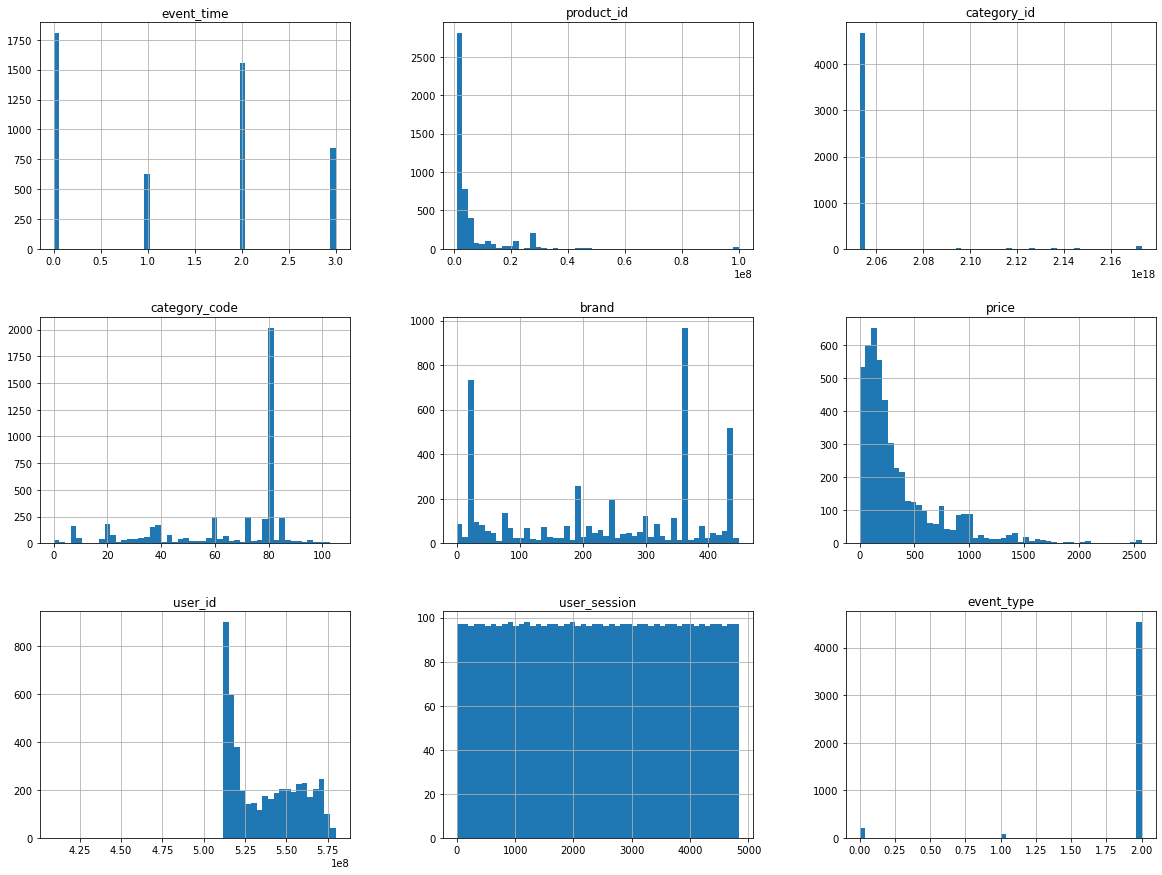

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.figure(dpi=300)
plt.show()

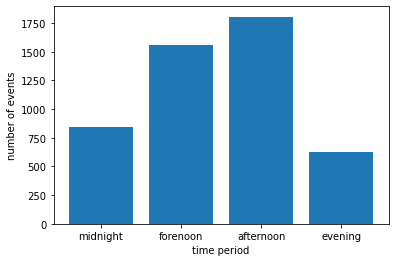

<Figure size 1800x1200 with 0 Axes>

In [23]:
length1 = train["event_time"].value_counts()[2]
length2 = train["event_time"].value_counts()[1]
length3 = train["event_time"].value_counts()[0]
length4 = train["event_time"].value_counts()[3]

data = pd.DataFrame({'midnight':[length1],'forenoon':[length2],'afternoon':[length3],'evening':[length4]})
fig,ax = plt.subplots()
ax.bar(range(4),data.sum())
ax.set_xticks(range(4))
ax.set_xticklabels(data.columns)
ax.set_xlabel('time period',fontsize=10)
ax.set_ylabel('number of events',fontsize=10)
plt.title('number of events versus time period',fontsize=13)
plt.figure(dpi=300)
plt.show()


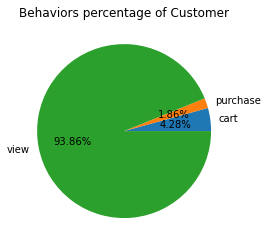

<Figure size 3000x2000 with 0 Axes>

In [25]:
pie_chart = train.groupby('event_type').size().reset_index(name = 'temp')
plt.pie(pie_chart['temp'], labels = pie_chart['event_type'],autopct = '%1.2f%%')
plt.title('Behaviors percentage of Customer')
plt.figure(dpi=500)
plt.subplots_adjust(0.3,0,1,1)
plt.show()

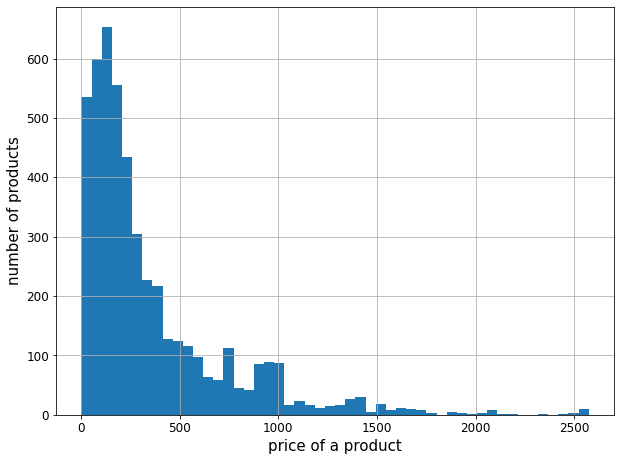

<Figure size 900x600 with 0 Axes>

In [30]:
af = train["price"]
import matplotlib.pyplot as plt
af.hist(bins=50, figsize=(10,7.5))
plt.xlabel('price of a product',fontsize=15)
plt.ylabel('number of products',fontsize=15)
plt.figure(dpi=150)
plt.show()

# Models operating

# 1.Linear regression

In [31]:
df1=train.drop(['product_id','category_id','category_code','user_id','user_session'],axis=1)

In [32]:
df1

,event_time,event_type,brand,price
0,evening,view,magnetta,105.09
1,afternoon,view,samsung,252.63
2,afternoon,view,samsung,175.00
3,midnight,view,xiaomi,282.63
4,midnight,view,samsung,154.16
...,...,...,...,...
7795,midnight,view,samsung,1261.27
7796,forenoon,view,samsung,964.74
7798,afternoon,view,hp,223.69
7799,afternoon,view,lenovo,875.16


In [33]:
product_tags = df1.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
le = le.fit(product_tags)
label = le.transform(product_tags)
df1.iloc[:, 0] = label\

product_tags1 = df1.iloc[:, 1]
le = LabelEncoder() 
le = le.fit(product_tags1)
label = le.transform(product_tags1)
df1.iloc[:, 1] = label

product_tags2 = df1.iloc[:, 2]
le = LabelEncoder() 
le = le.fit(product_tags2)
label = le.transform(product_tags2)
df1.iloc[:, 2] = label

In [34]:
df1

,event_time,event_type,brand,price
0,1,2,253,105.09
1,0,2,363,252.63
2,0,2,363,175.00
3,3,2,439,282.63
4,3,2,363,154.16
...,...,...,...,...
7795,3,2,363,1261.27
7796,2,2,363,964.74
7798,0,2,193,223.69
7799,0,2,243,875.16


In [35]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

In [36]:
test_set.head()

,event_time,event_type,brand,price
5309,0,2,367,90.39
4050,1,2,439,188.75
1617,0,2,439,478.26
5295,0,2,26,377.10
7113,3,2,363,347.41


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
from sklearn import linear_model

In [38]:
results = smf.ols('event_time ~ event_type + price + brand', data=df1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.870
Date:                Sat, 02 Oct 2021   Prob (F-statistic):             0.0351
Time:                        03:05:12   Log-Likelihood:                -7500.5
No. Observations:                4835   AIC:                         1.501e+04
Df Residuals:                    4831   BIC:                         1.503e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5038      0.083     18.160      0.0

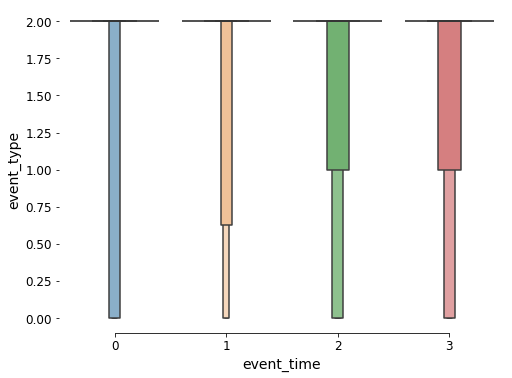

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
sns.boxenplot(x='event_time',y='event_type',data=df1)
sns.despine(trim=True,left=True)

In [40]:
corr=df1.corr()
corr

,event_time,event_type,brand,price
event_time,1.000000,-0.034140,0.005030,-0.024482
event_type,-0.034140,1.000000,0.026486,-0.006824
brand,0.005030,0.026486,1.000000,-0.303114
price,-0.024482,-0.006824,-0.303114,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'event_time'),
  Text(0, 1.5, 'event_type'),
  Text(0, 2.5, 'brand'),
  Text(0, 3.5, 'price')])

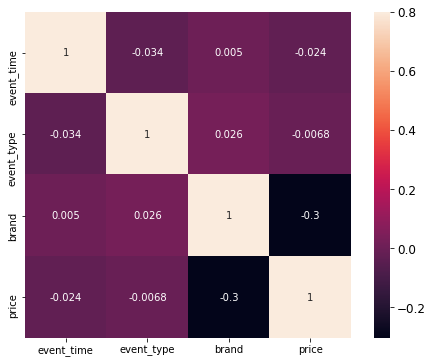

In [41]:
ax=plt.subplots(figsize=(8,6))
ax=sns.heatmap(corr,vmax=.8,square=True,annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Linear regression(2)

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [43]:
cols = list(df1)
cols.insert(1,cols.pop(cols.index('event_time'))) # 2是将d放在哪一列，cols.pop(cols.index('d')) 是要换的d列
df1 = df1.loc[:,cols] # 开始按照两列互换

## 对数据集进行测试集合训练集划分
# X：特征矩阵(类型一般是DataFrame)
# Y：特征对应的Label标签(类型一般是Series)
# test_size: 对X/Y进行划分的时候，测试集合的数据占比, 是一个(0,1)之间的float类型的值
# random_state: 数据分割是基于随机器进行分割的，该参数给定随机数种子；给一个值(int类型)的作用就是保证每次分割所产生的数数据集是完全相同的

X = df1.iloc[:,1:]
Y=df1['event_type']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(3868, 3)
(967, 3)
(3868,)


In [44]:
# 查看训练集上的数据信息(X)
X_train.describe()

,event_time,brand,price
count,3868.000000,3868.000000,3868.000000
mean,1.306101,236.820321,350.662236
std,1.140910,148.559733,371.801927
min,0.000000,0.000000,0.870000
25%,0.000000,75.750000,109.715000
50%,1.500000,244.000000,216.200000
75%,2.000000,363.000000,458.420000
max,3.000000,448.000000,2574.040000


In [45]:
from sklearn.preprocessing import StandardScaler
## 数据标准化
# StandardScaler：将数据转换为标准差为1的数据集(有一个数据的映射)
# scikit-learn中：如果一个API名字有fit，那么就有模型训练的含义，没法返回值
# scikit-learn中：如果一个API名字中有transform， 那么就表示对数据具有转换的含义操作
# scikit-learn中：如果一个API名字中有predict，那么就表示进行数据预测，会有一个预测结果输出
# scikit-learn中：如果一个API名字中既有fit又有transform的情况下，那就是两者的结合(先做fit，再做transform)
ss = StandardScaler() # 模型对象创建
X_train = ss.fit_transform(X_train) # 训练模型并转换训练集
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 (测试集)

pd.DataFrame(X_train).describe()


,0,1,2
count,3.868000e+03,3.868000e+03,3.868000e+03
mean,-1.785886e-16,-7.778450e-18,2.033017e-16
std,1.000129e+00,1.000129e+00,1.000129e+00
min,-1.144938e+00,-1.594315e+00,-9.409243e-01
25%,-1.144938e+00,-1.084353e+00,-6.481365e-01
50%,1.699729e-01,4.833482e-02,-3.616969e-01
75%,6.082764e-01,8.494630e-01,2.898632e-01
max,1.484883e+00,1.421697e+00,5.980779e+00


In [46]:
## 模型训练
import numpy as np
lr = LinearRegression(fit_intercept=True) # 模型对象构建
'''
LinearRegression(fit_intercept=True, normalize=False,copy_X=True,n_jobs=1)
	fit_intercept：是否需要截距
	normalize：是否做标准化，上面已在单拿出来做了标准化
	copy_X：是否进行数据复制，如果复制了，对数据进行修改，就不会改变原数据
	n_jobs：并行运行。但需要CPU至少双核，基本不怎么用
'''
lr.fit(X_train, Y_train) ## 训练模型
## 模型校验
y_predict = lr.predict(X_test) ## 预测结果

print("training R2:",lr.score(X_train, Y_train))
print("test R2:",lr.score(X_test, Y_test))
mse = np.average((y_predict-Y_test)**2)
rmse = np.sqrt(mse)
print("rmse:",rmse)
# 输出模型训练得到的相关参数
print("model coefficient(θ):", end="")
print(lr.coef_)
print("model intercept:", end='')
print(lr.intercept_)


training R2: 0.0011038080776824
test R2: 0.003625791036768078
rmse: 0.40404104550193154
model coefficient(θ):[-0.01109245  0.00799801 -0.00229316]
model intercept:1.8932264736297828


### Model testing (require sklearn version =0.24)  

In [47]:
## 模型保存/持久化
# 在机器学习部署的时候，实际上其中一种方式就是将模型进行输出；另外一种方式就是直接将预测结果输出
# 模型输出一般是将模型输出到磁盘文件
from sklearn.externals import joblib

# 保存模型要求给定的文件所在的文件夹比较存在
joblib.dump(ss, "df1_ss.model") ## 将标准化模型保存
joblib.dump(lr, "df1_lr.model") ## 将模型保存

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [25]:
#load model
ss3 = joblib.load("df1_ss.model") 
lr3 = joblib.load("df1_lr.model") 

# predict
df1 = [[3, 398, 127.91]]
df1 = ss.transform(df1)
print(df1)
lr.predict(df1)

[[ 1.50115554  0.81685402 -0.59932793]]


array([1.87817724])

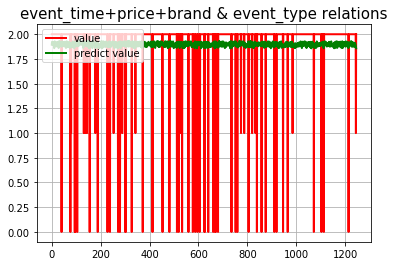

In [26]:
## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, Y_test, 'r-', linewidth=2, label='value')
plt.plot(t, y_predict, 'g-', linewidth=2, label='predict value')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("event_time+price+brand & event_type relations", fontsize=15)
plt.grid(b=True)#加网格
plt.show()

# Linear Regression(3)

In [193]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
results = smf.ols(formula='event_time ~ event_type + price', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.020
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           0.000332
Time:                        00:16:52   Log-Likelihood:                -9658.6
No. Observations:                6228   AIC:                         1.932e+04
Df Residuals:                    6225   BIC:                         1.934e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5480      0.069     22.473      0.0

# 2.Random forest

In [50]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [51]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
,"Random Forest:{}".format(score_r)
)

Single Tree:0.8697450034458993 Random Forest:0.9076498966230186


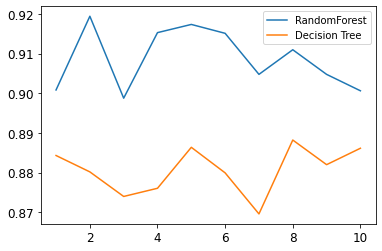

In [52]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,X,Y,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,X,Y,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

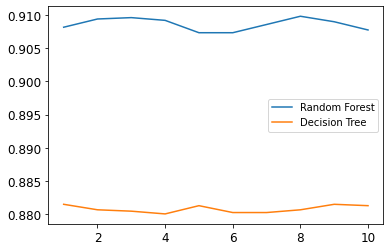

In [53]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,X,Y,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,X,Y,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

# 3.KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
knn = KNeighborsClassifier()    
knn.fit(X_train, Y_train)      
score_k = knn.score(Xtest,Ytest)
print(score_k)

0.9338387319090282


# 4.ADA Boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
ada = AdaBoostClassifier()    
ada.fit(X_train, Y_train)       
score_k = ada.score(Xtest,Ytest)
print(score_k)

0.9345279117849759


# 5.Netural network

In [82]:
from sklearn.neural_network import MLPClassifier

rdm = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(6228,1500,1000,), random_state=1)
rdm.fit(X_train, Y_train)
rdm.score(X_test,Y_test)

0.92

In [81]:
from sklearn import preprocessing
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, Y = make_classification(random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)  # apply scaling on training data
pipe.score(X_test, Y_test)

0.96